In [1]:
import torch
from torchvision import models
from torch.utils.data import DataLoader,Dataset

In [2]:
import numpy as np

In [3]:
import os

In [4]:
#### Get list of input images ####
train_imgs=os.listdir("/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/nails-segmentation/images")

In [5]:
train_imgs[0:4]

['d97db2d2-18ff-456d-8d85-23bfb7109aef.jpg',
 'bf93c2e2-7b5f-4108-ae85-4ef68564d418.jpg',
 '34404E67-4BB8-432E-863E-C1BEF5EB37E0.jpg',
 '4c490eae-e402-11e8-97db-0242ac1c0002.jpg']

In [6]:
mask_imgs=os.listdir("/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/nails-segmentation/labels")

In [7]:
mask_imgs[0:4]

['d97db2d2-18ff-456d-8d85-23bfb7109aef.jpg',
 'bf93c2e2-7b5f-4108-ae85-4ef68564d418.jpg',
 '34404E67-4BB8-432E-863E-C1BEF5EB37E0.jpg',
 '4c490eae-e402-11e8-97db-0242ac1c0002.jpg']

In [8]:
import PIL
import cv2

In [9]:
class SegData(Dataset):
    def __init__(self,input_names,target_names,base_path,min_size=224):
        self.input_names=input_names
        self.target_names=target_names
        self.base_path=base_path
        self.min_size=224
    def __len__(self):
        return len(self.input_names)
    def __getitem__(self,idx):
        path_input=os.path.join(base_path,"images",self.input_names[idx])
        input_img=cv2.imread(path_input)
        input_img=cv2.resize(input_img,(self.min_size,self.min_size),interpolation = cv2.INTER_NEAREST)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
        
        path_target=os.path.join(base_path,"labels",self.target_names[idx])
        target_img=cv2.imread(path_target)
        target_img=cv2.resize(target_img,(self.min_size,self.min_size),interpolation = cv2.INTER_NEAREST)
        target_img=cv2.cvtColor(target_img, cv2.COLOR_BGR2GRAY)
        _,target_img=cv2.threshold(target_img,0,1,cv2.THRESH_BINARY)        
        sample={'X':input_img,'y':target_img}
        return sample
            
    

In [10]:
base_path="/Users/gunnvantsaini/OneDrive/project_codes/content/dl_basics/sony/data/nails-segmentation"
seg_data=SegData(train_imgs[0:4],mask_imgs[0:4],base_path)

In [11]:
next(iter(seg_data))['y'].shape

(224, 224)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

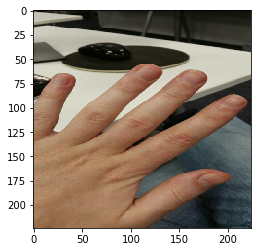

In [13]:
plt.imshow(next(iter(seg_data))['X'])

In [14]:
np.unique(next(iter(seg_data))['y'])

array([0, 1], dtype=uint8)

In [15]:
train_data_seg=DataLoader(seg_data,batch_size=1)

In [16]:
fcn=models.segmentation.fcn_resnet50(num_classes=2)

In [17]:
##### Write train loop ######
from torch import nn
import torch.optim as optim

In [18]:
opt=optim.Adam(fcn.parameters())
criterion=nn.CrossEntropyLoss()

In [19]:
from tqdm.notebook import tqdm

In [20]:
num_epochs=1
for i,batch in tqdm(enumerate(train_data_seg)):
    X=batch['X'].float().permute(0,3,1,2) ### different from reshape
    y=batch['y'].long()
    preds=fcn(X)['out']
    loss=criterion(preds,y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    print(f"Epoch: {1}, iter: {i+1}, loss: {round(loss.item(),2)}")    

Epoch: 1, iter: 1, loss: 0.71
Epoch: 1, iter: 2, loss: 1.69
Epoch: 1, iter: 3, loss: 1.3
Epoch: 1, iter: 4, loss: 1.31

